Module 2, Lab 4 - Power 1
=========================

In this lab, we explore the concept of statistical power. Recall that
power is the ability to reject the null hypothesis. Greater power means
greater ability to reject the null hypothesis. Of course, if you cannot
reject the null hypothesis, you cannot rule out random chance as an
explanation for your findings. Therefore, the ability to reject the null
hypothesis should be considered a bare minimum for any research or data
science finding that relies on samples to estimate populations. In fact,
as we saw in the confidence interval lab, it's often desirable to be
even more precise than rejecting the null hypothesis (i.e., more precise
than "effect is not zero"). Still, good power is a bare minimum
requirement.

Note: you will need the `effsize` package for this lab to measure effect
sizes; you will also need the `pwr` package. We will do some data
visualization with `ggplot2` as well:

In [1]:
### LOAD PACKAGES ####
from scipy import stats

Note that for this lab you need to be familiar with the effect size
statistic, Cohen's *d*, discussed in the online lesson. I will assume
you have watched this and are familiar with how *p*-values work to
reject the null hypothesis. If you need to refresh these concepts, do so
before completing this lab. The standard guidelines for Cohen's *d* are:
<pre>
| #  |    d Value    |  Meaning   |
|:--:|:-------------:|:----------:|
| 1. |    0 - 0.2    | Negligible |
| 2. |   0.2 - 0.5   |   Small    |
| 3. |   0.5 - 0.8   |   Medium   |
| 4. |     0.80 +    |   Large    |
</pre>

Power Overview
==============

Technically defined, power is the proportion of the time in which you
would achieve *p* &lt; .05 for a given population effect size. Power is
relevant *only* when the null hypothesis is false. Assuming that the
null is false, what is the likelihood that your study will actually
detect the effect that is truly present? For example, a study that has
only 20% power has only a 20% chance to actually detect the effect that
is present (i.e., achieve statistical significance, *p* &lt; .05).
Clearly, you do not want your study to be set up to fail. You want good
power...usually the recommendation is .80 or higher.

Power is **highly dependnet on sample size**.

For example, imagine that, in the population, the size of the difference
between two groups (e.g., "intervention group to increase productivity"
vs. "business as usual" group) was *d* = .4. A study with *n*= 40 people
per group would only have 42% power, i.e., be able to reject the null
hypothesis 42% of the time.

How do I know that? I used a power calculator.

This can be easily calculated using the `tt_ind_solve_power` function in the
`statsmodels.stats.power` Python package. 

In [2]:
from statsmodels.stats.power import tt_ind_solve_power
tt_ind_solve_power(effect_size=0.4, nobs1 = 40, alpha=0.05, power=None, ratio=1, alternative='two-sided')

0.4235211505921998

We see here that the power is given as `power = 0.4235212`.

Power is a function of both the effect size and the sample size. Imagine
that we had a larger sample, say *n* = 100 people per group. Would our
power improve?

In [3]:
tt_ind_solve_power(effect_size=0.4, nobs1 = 100, alpha=0.05, power=None, ratio=1, alternative='two-sided')

0.8036474965430769

Indeed, now we have reached 80% power, the standard guideline for
acceptable power.

We could see what happens if we use larger groups, say 150 per group:

In [4]:
tt_ind_solve_power(effect_size=0.4, nobs1 = 150, alpha=0.05, power=None, ratio=1, alternative='two-sided')

0.9322751860167275

Now we have 93% power. You always want high power. If power is low, you
risk missing real effects, spending time and energy on a study coming up
empty even when there is something to be found.

To reiterate, in power calculations, there are always three things that
interrelate:

1.  Power
2.  Sample size (*n* per group in group-comparison studies)
3.  Effect size

In most power calculators, you enter any two of those three, and the
third can be determined for you.

For example, say we are planning a study and want to know how many
responses are required. We can specify the desired power (leave `n`
blank) and the command will find the required sample size:

In [5]:
tt_ind_solve_power(effect_size=0.4, nobs1 = None, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')

99.08032683981143

We see here that this study would require 100 people per group (best to
round up).

However, the relationship between sample size and power is not fixed. In
fact, power also goes down as effect size goes down. This should make
sense: it is much harder to detect a very tiny effect than it is a very
large effect. Let's re-run the last command, asking how many people are
needed for 80% power but now considering the situation where the
population *d* is smaller, *d* = .20:

In [6]:
tt_ind_solve_power(effect_size=0.2, nobs1 = None, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')

393.4056989990335

We see now that our required sample size has jumped to 394 per group, a
much larger and more expensive study.

So, as you plan studies, you need to tell a power calculator the desired
power level (recommended: 80% or .80) *and* the population effect size.

**However, you don't know the population effect size. If you did, you
wouldn't be running a research study, would you?**

Standard practice, therefore, is to input the smallest effect size you
would care to be able to detect (called "smallest effect size of
interest, or SESOI).

For example, perhaps your research question is *very important* and you
want to be able to detect any effect, even if it is small. In that case,
power the study as above with 394 people per group.

Or, perhaps a small effect is unimportant to you; you care to know if an
effect is present but really only if it's large (you're fine getting a
null result if the effect is small; small effects are not important to
you). In that case, you can use a more lenient criteria:

In [7]:
tt_ind_solve_power(effect_size=0.8, nobs1 = None, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')

25.52457250047935

This example would let us have 80% power to detect a large effect with
only 26 people per group. However, the high power is only present when
the effect is that large. if the effect were smaller, your power would
be worse and you would likely miss it. Let's take that same sample size
and consider what would happen if your effects were smaller than *d* =
.80. Try running the command for *nobs* = 26 and *d* = .30. What is the
power?

In [8]:
tt_ind_solve_power(effect_size=0.3, nobs1 = 26, alpha=0.05, power=None, ratio=1, alternative='two-sided')

0.18558861172807584

Yikes! For that 26-person-per-group study, if the population effect size
were *d* = .30, we would have only an 18% chance of detecting the
effect. Thus, the *same* study can have very good power to detect large
effects but terrible power to detect small effects. Thus, the researcher
should always decide the smallest effect size of interest and power the
study to detect that.

Just to play with this some more, let's illustrate how a sample size of
26 per group performs across a variety of effect sizes. I will use a
loop command to do this.

In [9]:
import pandas as pd
d_vals = [x/10.0 for x in range(1, 16)]
powers = [tt_ind_solve_power(effect_size=x, nobs1 = 26, alpha=0.05, power=None, ratio=1, alternative='two-sided') 
                    for x in d_vals]
d_powers = pd.DataFrame({'d_values':d_vals, 'power':powers})
d_powers

,d_values,power
0,0.1,0.064449
1,0.2,0.108995
2,0.3,0.185589
3,0.4,0.293111
4,0.5,0.424034
5,0.6,0.564252
6,0.7,0.696798
7,0.8,0.807487
8,0.9,0.889166
9,1.0,0.942430


Using that sample size of 26, we see that we have excellent power to
detect large effect sizes (Cohen *d* values .80 and above), but we would
have very low power (very likely to get a non-significant result) if the
effect is small. In such cases, we would likely come back and say "we
did not find a difference" when really we simply missed what was there.

Thus, you must always decide the smallest effect size you want to be
able to have good power to detect. This should be based on the
importance of the question, resources available, and how big you guess
the effect might be. If you are chasing very nuanced things in noisy
data, you may need very large samples to get statistical significance.

Planning Sample Size
====================

Sometimes it can be handy to generate a number of power estimates for
different effect sizes and sample sizes. The code in the cell below performs the following processing:
1. A list of d values is created with a list comprehension.
2. A data frame is created with a single column for sample sizes.
3. Loop over the d values. Within the loop a list comprehension is used to compute the power of the test for each sample size. 

Execute this code:

In [10]:
## create list of d values
d_vals = [x/10.0 for x in range(2,16)]

## Initialize data frame
powers = pd.DataFrame({'sample_size':range(20,210,10)})
## Loop over d values
for d_val in d_vals:
    col_name = 'd = ' + str(d_val)
    ## List comprehension for each d value itterating over the sample sizes
    powers[col_name] = [tt_ind_solve_power(effect_size=d_val, nobs1 = x, alpha=0.05, power=None, ratio=1, alternative='two-sided')
                      for x in range(20,210,10)]
        
powers   

,sample_size,d = 0.2,d = 0.3,d = 0.4,d = 0.5,d = 0.6,d = 0.7,d = 0.8,d = 0.9,d = 1.0,d = 1.1,d = 1.2,d = 1.3,d = 1.4,d = 1.5
0,20,0.094567,0.152268,0.234349,0.337939,0.456034,0.578290,0.693404,0.792036,0.868953,0.923550,0.958827,0.979575,0.990685,0.996100
1,30,0.118679,0.207852,0.331522,0.477897,0.627505,0.759905,0.861423,0.928872,0.967708,0.987086,0.995465,0.998605,0.999625,0.999912
2,40,0.143080,0.263284,0.423521,0.598147,0.754952,0.871133,0.942182,0.978044,0.992985,0.998122,0.999580,0.999922,1.000000,1.000000
3,50,0.167675,0.317802,0.508186,0.696893,0.843875,0.933907,0.977279,0.993712,0.998607,0.999754,1.000000,1.000000,1.000000,1.000000
4,60,0.192375,0.370802,0.584382,0.775266,0.903115,0.967314,0.991481,0.998300,0.999742,1.000000,1.000000,1.000000,1.000000,1.000000
5,70,0.217094,0.421819,0.651730,0.835822,0.941194,0.984313,0.996925,0.999561,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,80,0.241758,0.470512,0.710370,0.881602,0.964976,0.992660,0.998925,0.999891,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,90,0.266296,0.516642,0.760782,0.915587,0.979481,0.996639,0.999634,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,100,0.290646,0.560059,0.803647,0.940427,0.988152,0.998490,0.999878,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,110,0.314751,0.600687,0.839748,0.958341,0.993246,0.999333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Execute the code in the cell below to plot power vs. the sample size for each of the d values:

Text(0.5,0,'Sample Size')

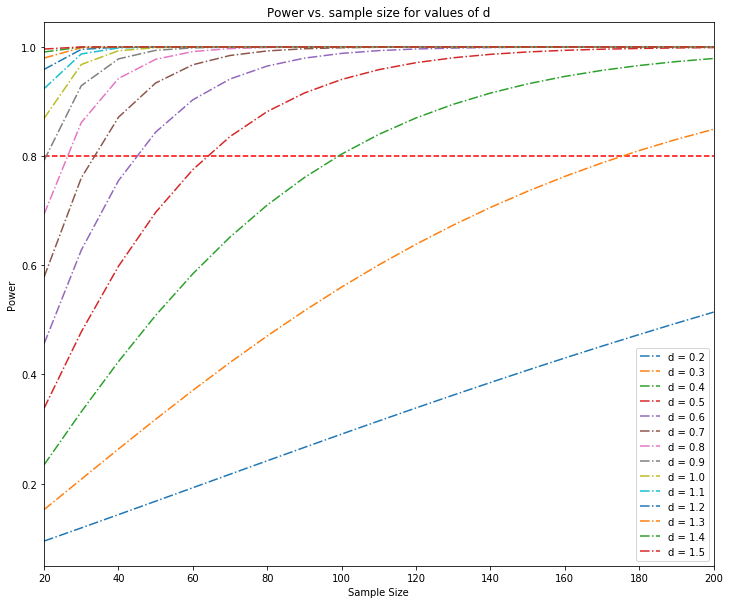

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(12,10)) # define plot area
ax = fig.gca() # define axis
powers.plot(x = 'sample_size', ax = ax, linestyle = '-.')
plt.hlines(y = 0.8, xmin = 20, xmax = 200, color = 'red', linestyle = '--')
plt.title('Power vs. sample size for values of d')
plt.ylabel('Power')
plt.xlabel('Sample Size')

You can modify the above code for different sample sizes and ranges, but
the rest stays the same. You can easily see with the graph that 80%
power (red dashed line) would take 180 participants per group for a *d*
= .03 but would only take 45 people per group at *d* = .06.

One Final Word of Caution
=========================

Some people have brushed aside the issue of poor power, especially when
a result is significant. After all, if a result is significant, it *had*
power to reject the null, right?

Wrong. Beware significant findings from under-powered studies.

Consider a study that has very low power. In such a case, the researcher
has almost *no* ability to find true effects.

However, false positives *still happen* 5% of the time (when the null is
true).

Thus, as power gets lower, the number of "true" positives (real effects,
discovered) goes down, while the number of false positives stays fixed.
When power is low, false positives can equal or even outnumber true
positives. In such cases, when an effect is significant, it is very
challenging to know whether the effect is a true positive or a false
positive. We will explore this issue in a future lesson, but take this
as a word of caution about under-powered studies.